In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import SGD, Adam
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
'定義子資料夾名稱&對應的數字，檔名不能有中文'
class_names = ['Brown-Headed Barbet','Buffalo','butterfly','cat','Cattle Egret','chicken','Common Kingfisher','Common Myna','Common Rosefinch','Common Tailorbird','Coppersmith Barbet','cow','deer','dog','elephant','Forest Wagtail','fox','gharial','Gray Wagtail','Green Bee-Eater','Hoopoe','horse','House Crow','hyena','Indian Grey Hornbill','Indian Pitta','Indian Roller','Jungle Babbler','kangaroo','leopard','lion','Northern Lapwing','pangolin','Peacock','Python','Red-Wattled Lapwing','Rhino','Ruddy Shelduck','Rufous Treepie','Russell\'s Viper','Sarus Crane','shark','sheep','spider','tiger','White Wagtail','White-Breasted Kingfisher','White-Breasted Waterhen','wolf','zebra']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64)

In [3]:
def load_data():
    datasets = ['training_set', 'test_set']#資料夾
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                try:
                    # Get the path name of the image
                    img_path = os.path.join(os.path.join(dataset, folder), file)

                    # Open and resize the img
                    image = cv2.imread(img_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    #cv讀照片，顏色莫認為BGR，需轉為RGB，錯誤表示黑白或已轉
                    image = cv2.resize(image, IMAGE_SIZE) 

                    # Append the image and its corresponding label to the output
                    images.append(image)
                    labels.append(label)
                except:
                    print(img_path)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading training_set


100%|█████████████████████████████████████████████████████████████████████████████| 1074/1074 [00:01<00:00, 616.22it/s]


Loading test_set


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 99.32it/s]


In [5]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [6]:
'隨機性'
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
'標準化'
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [7]:
'建模'
input_shape = (64, 64, 3)

model = Sequential([
    Conv2D(128, (3, 3), input_shape=input_shape, padding='same',
           activation='elu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.2),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.15),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.1),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.5),
    Flatten(),
    Dense(122, activation='softmax') #輸出層，分類用softmax
])
model.compile(optimizer = 'adam', #SGD(lr=0.1)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, 
                    #validation_data=(test_images, test_labels),
                    #verbose=2,callbacks=[earlyStop],
                    batch_size=128, epochs=500)

Epoch 1/500
456/456 [==============================] - 21s 25ms/step - loss: 3.2793 - accuracy: 0.1726
Epoch 2/500
456/456 [==============================] - 11s 25ms/step - loss: 2.3377 - accuracy: 0.3684
Epoch 3/500
456/456 [==============================] - 11s 25ms/step - loss: 1.9322 - accuracy: 0.4646
Epoch 4/500
456/456 [==============================] - 11s 25ms/step - loss: 1.6798 - accuracy: 0.5287
Epoch 5/500
456/456 [==============================] - 11s 25ms/step - loss: 1.5056 - accuracy: 0.5745
Epoch 6/500
456/456 [==============================] - 11s 25ms/step - loss: 1.3663 - accuracy: 0.6130
Epoch 7/500
456/456 [==============================] - 11s 25ms/step - loss: 1.2476 - accuracy: 0.6417
Epoch 8/500
456/456 [==============================] - 11s 25ms/step - loss: 1.1504 - accuracy: 0.6666
Epoch 9/500
456/456 [==============================] - 11s 25ms/step - loss: 1.0658 - accuracy: 0.6891
Epoch 10/500
456/456 [==============================] - 11s 25ms/step - l

456/456 [==============================] - 11s 25ms/step - loss: 0.3024 - accuracy: 0.9237
Epoch 80/500
456/456 [==============================] - 11s 25ms/step - loss: 0.3046 - accuracy: 0.9216
Epoch 81/500
456/456 [==============================] - 11s 25ms/step - loss: 0.3017 - accuracy: 0.9210
Epoch 82/500
456/456 [==============================] - 11s 25ms/step - loss: 0.3029 - accuracy: 0.9222
Epoch 83/500
456/456 [==============================] - 11s 25ms/step - loss: 0.3192 - accuracy: 0.9189
Epoch 84/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2954 - accuracy: 0.9241
Epoch 85/500
456/456 [==============================] - 11s 25ms/step - loss: 0.3045 - accuracy: 0.9217
Epoch 86/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2974 - accuracy: 0.9238
Epoch 87/500
456/456 [==============================] - 11s 25ms/step - loss: 0.3044 - accuracy: 0.9235
Epoch 88/500
456/456 [==============================] - 11s 25ms/step - loss:

456/456 [==============================] - 11s 25ms/step - loss: 0.2701 - accuracy: 0.9408
Epoch 158/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2951 - accuracy: 0.9358
Epoch 159/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2768 - accuracy: 0.9376
Epoch 160/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2841 - accuracy: 0.9387
Epoch 161/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2882 - accuracy: 0.9369
Epoch 162/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2912 - accuracy: 0.9374
Epoch 163/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2704 - accuracy: 0.9396
Epoch 164/500
456/456 [==============================] - 11s 25ms/step - loss: 0.3075 - accuracy: 0.9355
Epoch 165/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2707 - accuracy: 0.9398
Epoch 166/500
456/456 [==============================] - 11s 25ms/ste

456/456 [==============================] - 11s 25ms/step - loss: 0.2503 - accuracy: 0.9498
Epoch 236/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2784 - accuracy: 0.9446
Epoch 237/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2896 - accuracy: 0.9415
Epoch 238/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2695 - accuracy: 0.9464
Epoch 239/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2736 - accuracy: 0.9460
Epoch 240/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2686 - accuracy: 0.9465
Epoch 241/500
456/456 [==============================] - 11s 25ms/step - loss: 0.3350 - accuracy: 0.9375
Epoch 242/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2420 - accuracy: 0.9506
Epoch 243/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2768 - accuracy: 0.9463
Epoch 244/500
456/456 [==============================] - 11s 25ms/ste

456/456 [==============================] - 12s 26ms/step - loss: 0.2552 - accuracy: 0.9503
Epoch 314/500
456/456 [==============================] - 12s 26ms/step - loss: 0.2773 - accuracy: 0.9477
Epoch 315/500
456/456 [==============================] - 12s 26ms/step - loss: 0.2838 - accuracy: 0.9472
Epoch 316/500
456/456 [==============================] - 12s 26ms/step - loss: 0.3073 - accuracy: 0.9446
Epoch 317/500
456/456 [==============================] - 12s 26ms/step - loss: 0.2955 - accuracy: 0.9462
Epoch 318/500
456/456 [==============================] - 12s 26ms/step - loss: 0.2513 - accuracy: 0.9527
Epoch 319/500
456/456 [==============================] - 12s 26ms/step - loss: 0.2391 - accuracy: 0.9556
Epoch 320/500
456/456 [==============================] - 12s 26ms/step - loss: 0.2692 - accuracy: 0.9502
Epoch 321/500
456/456 [==============================] - 12s 26ms/step - loss: 0.2741 - accuracy: 0.9481
Epoch 322/500
456/456 [==============================] - 12s 26ms/ste

456/456 [==============================] - 12s 26ms/step - loss: 0.2551 - accuracy: 0.9527
Epoch 392/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2576 - accuracy: 0.9539
Epoch 393/500
456/456 [==============================] - 11s 25ms/step - loss: 0.3727 - accuracy: 0.9343
Epoch 394/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2912 - accuracy: 0.9486
Epoch 395/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2249 - accuracy: 0.9566
Epoch 396/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2629 - accuracy: 0.9537
Epoch 397/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2606 - accuracy: 0.9523
Epoch 398/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2725 - accuracy: 0.9502
Epoch 399/500
456/456 [==============================] - 11s 25ms/step - loss: 0.2469 - accuracy: 0.9543
Epoch 400/500
456/456 [==============================] - 11s 25ms/ste

456/456 [==============================] - 12s 26ms/step - loss: 0.3010 - accuracy: 0.9490
Epoch 470/500
456/456 [==============================] - 12s 26ms/step - loss: 0.2896 - accuracy: 0.9483
Epoch 471/500
456/456 [==============================] - 12s 26ms/step - loss: 0.2987 - accuracy: 0.9478
Epoch 472/500
456/456 [==============================] - 12s 26ms/step - loss: 0.2968 - accuracy: 0.9518
Epoch 473/500
456/456 [==============================] - 12s 26ms/step - loss: 0.2425 - accuracy: 0.9572
Epoch 474/500
456/456 [==============================] - 12s 26ms/step - loss: 0.2960 - accuracy: 0.9482
Epoch 475/500
456/456 [==============================] - 12s 26ms/step - loss: 0.2612 - accuracy: 0.9537
Epoch 476/500
456/456 [==============================] - 12s 26ms/step - loss: 0.3318 - accuracy: 0.9430
Epoch 477/500
456/456 [==============================] - 12s 26ms/step - loss: 0.2870 - accuracy: 0.9489
Epoch 478/500
456/456 [==============================] - 12s 26ms/ste

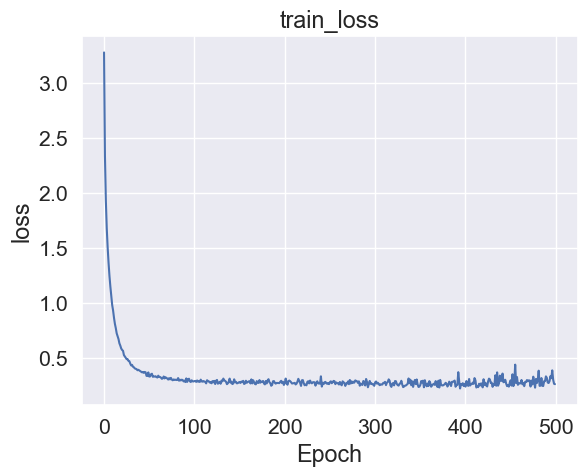

In [9]:
'模型概況'
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history["loss"])
#scores = model.evaluate(test_images, test_labels)  
#print('test:',result[1])

In [10]:
'預測'
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

19/19 [==============================] - 2s 8ms/step


In [11]:
'混淆矩陣'
CM = confusion_matrix(test_labels, pred_labels)
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
print(accuracy(CM))

0.614853195164076


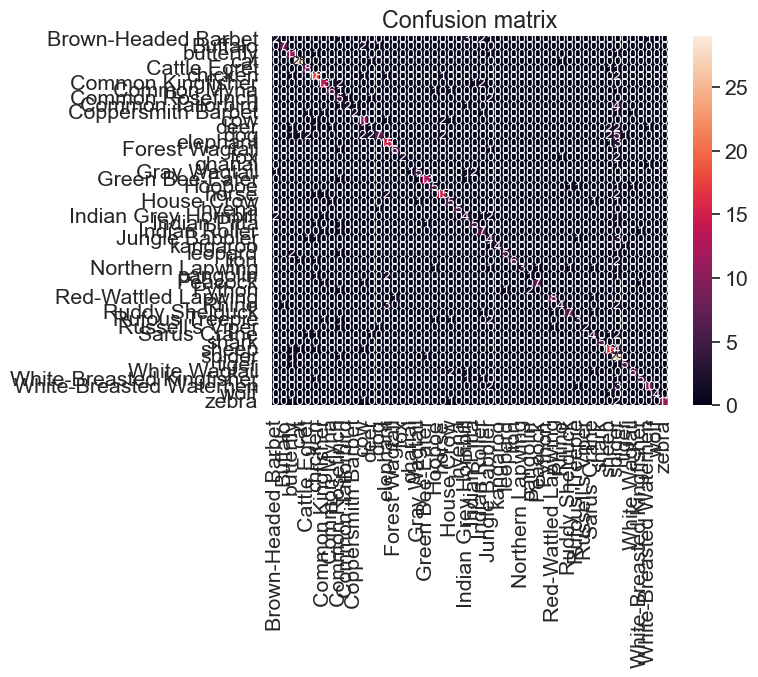

In [12]:
'混淆矩陣視覺化，看錯誤'
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [13]:
'存模型&讀模型'
from keras.models import load_model
model.save("31003-01_model")

INFO:tensorflow:Assets written to: 31003-01_model\assets


INFO:tensorflow:Assets written to: 31003-01_model\assets
